<a href="https://colab.research.google.com/github/santhoshbvsrk/CapstoneProjects/blob/main/DataAnalytics_CDF/InsaidTelecom_CDFCapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 

*  As the dataset is huge, we'll zip it, upload the zip file to google drive and mount your google drive to colab, unzip it to access data from your colab.


*   Import the drive package from google.colab library to mount your google drive on to google colab.





In [2]:
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).




*   Once mounting is completed, mention the path of your zip file which contains the data to read.

In [3]:
!unzip gdrive/My\ Drive/CDF_Capstone_Project/events_data.zip

Archive:  gdrive/My Drive/CDF_Capstone_Project/events_data.zip
  inflating: events_data.csv         




*   Once mounting and unzipping is completed successfully, you should be able to see the zip file contains in your colab folder.


In [4]:
import pandas as pd 
import numpy as np

In [5]:
events_data_df=pd.read_csv("events_data.csv")
events_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [6]:
events_data_df['state'].value_counts()

Delhi                       751733
Maharashtra                 677105
TamilNadu                   436282
AndhraPradesh               321332
MadhyaPradesh               232690
Rajasthan                   196361
WestBengal                  196161
Karnataka                    99058
UttarPradesh                 94750
Gujarat                      42881
Bihar                        35472
Punjab                       26195
Kerala                       23148
Haryana                      21053
Jharkhand                    18060
Orissa                       15904
Telangana                    12784
Assam                        12021
Chhattisgarh                  9754
Uttaranchal                   7720
JammuandKashmir               5385
Goa                           3250
Nagaland                      2298
Pondicherry                   1741
Mizoram                       1613
AndamanandNicobarIslands      1515
Meghalaya                     1515
HimachalPradesh               1409
Manipur             

Filtering out events_data for only 6 states as per the requirement given.

In [7]:
events_data_filtered_df= events_data_df[(events_data_df.state == 'WestBengal') | (events_data_df.state == 'Karnataka') | (events_data_df.state == 'Gujarat') | (events_data_df.state == 'Bihar') | (events_data_df.state == 'Punjab') | (events_data_df.state == 'Kerala')]

In [8]:
events_data_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422915 entries, 1 to 3252921
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   422915 non-null  int64  
 1   device_id  422867 non-null  float64
 2   timestamp  422915 non-null  object 
 3   longitude  422873 non-null  float64
 4   latitude   422873 non-null  float64
 5   city       422915 non-null  object 
 6   state      422915 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 25.8+ MB


Installing mysql connector for python

In [9]:
pip install mysql-connector-python-rf

     |████████████████████████████████| 11.9MB 350kB/s 
  Created wheel for mysql-connector-python-rf: filename=mysql_connector_python_rf-2.2.2-cp37-cp37m-linux_x86_64.whl size=249456 sha256=c519ff9b4fa4a16c1c9a4575b4b9c551f82cda02cf543b26d04d30ea872ed736
  Stored in directory: /root/.cache/pip/wheels/87/58/fb/d95c84fad7e1bebfed324c13e107ebb08e1997c9226532859a
Successfully built mysql-connector-python-rf


import package to connect to mysql and loading data from tables to dataframes

In [10]:
import mysql.connector

#this is to connect to mysql database
mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  password="student",
  database="Capstone1"
)

#declaring a cursor variable of database to hold data of a specific table
mycursor = mydb.cursor()

#mycursor variable holds the entire data from gender_age_train table
mycursor.execute("SELECT * FROM gender_age_train")

#using fetchall function to get data from cursor and populating in another variable
myresult = mycursor.fetchall()

#inserting table data from variable into a dataframe
gender_age_train_df = pd.DataFrame(myresult,columns=['device_id','Gender','Age','Age_Group'])

#mycursor variable holds the entire data from phone_brand_device_model table
mycursor.execute("SELECT * FROM phone_brand_device_model")

#using fetchall function to get data from cursor and populating in another variable, this overwrites data from previous load
myresult = mycursor.fetchall()

#inserting table data from variable into a dataframe
phone_brand_device_model_df = pd.DataFrame(myresult,columns=['device_id','Brand','Model'])

#printing sample data from the dataframes
print("Data from Gender_Age_Train Table")
print("---------------------------------")
print(gender_age_train_df.head())
print("**************************************")
print("\n")
print("Data from Phone_Brand_Device_Model Table")
print("-----------------------------------------")
print(phone_brand_device_model_df.head())
print("**************************************")

Data from Gender_Age_Train Table
---------------------------------
             device_id Gender  Age Age_Group
0 -8076087639492063270      M   35    M32-38
1 -2897161552818060146      M   35    M32-38
2 -8260683887967679142      M   35    M32-38
3 -4938849341048082022      M   30    M29-31
4   245133531816851882      M   30    M29-31
**************************************


Data from Phone_Brand_Device_Model Table
-----------------------------------------
             device_id Brand    Model
0  1877775838486905855  vivo      Y13
1 -3766087376657242966    小米     V183
2 -6238937574958215831  OPPO      R7s
3  8973197758510677470    三星    A368t
4 -2015528097870762664    小米  红米Note2
**************************************


In [11]:
events_data_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422915 entries, 1 to 3252921
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   422915 non-null  int64  
 1   device_id  422867 non-null  float64
 2   timestamp  422915 non-null  object 
 3   longitude  422873 non-null  float64
 4   latitude   422873 non-null  float64
 5   city       422915 non-null  object 
 6   state      422915 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 25.8+ MB


In [177]:
events_data_filtered_df.isna().sum()

event_id      0
device_id    48
timestamp     0
longitude    42
latitude     42
city          0
state         0
dtype: int64

In [179]:
events_data_filtered_df.dropna(inplace=True)

In [195]:
events_data_filtered_df['device_id'] = events_data_filtered_df['device_id'].astype('int64')

In [181]:
events_data_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422825 entries, 1 to 3252921
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   422825 non-null  int64  
 1   device_id  422825 non-null  int64  
 2   timestamp  422825 non-null  object 
 3   longitude  422825 non-null  float64
 4   latitude   422825 non-null  float64
 5   city       422825 non-null  object 
 6   state      422825 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 25.8+ MB


In [12]:
gender_age_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   Gender     74645 non-null  object
 2   Age        74645 non-null  int64 
 3   Age_Group  74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [13]:
phone_brand_device_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  87726 non-null  int64 
 1   Brand      87726 non-null  object
 2   Model      87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [14]:
gender_age_train_df['Gender'].value_counts()

M    47904
F    26741
Name: Gender, dtype: int64

No entries in gender_age_train dataframe with null Gender

In [15]:
phone_brand_device_model_df['Brand'].value_counts(ascending=False)

小米      21645
三星      19211
华为      15181
vivo     7596
OPPO     6717
        ...  
丰米          1
凯利通         1
赛博宇华        1
瑞米          1
西门子         1
Name: Brand, Length: 116, dtype: int64

No records in phone_brand_device_model dataframe with null Brand

Merging Dataframes on device_id to create a single dataframe which contains customer age, gender, mobile brand and model

In [183]:
device_data_df=pd.merge(events_data_filtered_df,gender_age_train_df,on='device_id',how='inner') #performing inner join to fetch only matching device_id records
device_data_df.fillna(0,inplace=True) #replacing null values in the columns with 0
device_data_df

,event_id,device_id,timestamp,longitude,latitude,city,state,Gender,Age,Age_Group
0,1836426,3872521790238090752,2016-05-01 20:29:14,71.294802,21.661309,Amreli,Gujarat,M,20,M22-
1,225132,3872521790238090752,2016-05-01 12:52:44,71.294802,21.661309,Amreli,Gujarat,M,20,M22-
2,815723,3872521790238090752,2016-05-01 12:28:56,71.294802,21.661309,Amreli,Gujarat,M,20,M22-
3,1300157,3872521790238090752,2016-05-04 23:24:57,71.294802,21.661309,Amreli,Gujarat,M,20,M22-
4,233682,3872521790238090752,2016-05-04 19:09:26,71.294802,21.661309,Amreli,Gujarat,M,20,M22-
...,...,...,...,...,...,...,...,...,...,...
2636,1530731,-228846787598753152,2016-05-07 10:35:00,88.413496,22.561318,Chakdaha,WestBengal,F,63,F43+
2637,2967042,-228846787598753152,2016-05-01 08:08:46,88.413496,22.561318,Chakdaha,WestBengal,F,63,F43+
2638,1334106,-2734689217401949696,2016-05-05 10:00:05,72.616658,23.056911,Ahmadabad,Gujarat,M,27,M27-28
2639,1776773,3711361681074975744,2016-05-02 15:54:13,70.861036,22.872394,Morvi,Gujarat,M,31,M29-31


In [184]:
device_data_df=pd.merge(device_data_df,phone_brand_device_model_df,on='device_id',how='inner')
device_data_df.fillna(0,inplace=True)
device_data_df

,event_id,device_id,timestamp,longitude,latitude,city,state,Gender,Age,Age_Group,Brand,Model
0,1836426,3872521790238090752,2016-05-01 20:29:14,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
1,225132,3872521790238090752,2016-05-01 12:52:44,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
2,815723,3872521790238090752,2016-05-01 12:28:56,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
3,1300157,3872521790238090752,2016-05-04 23:24:57,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
4,233682,3872521790238090752,2016-05-04 19:09:26,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
...,...,...,...,...,...,...,...,...,...,...,...,...
2636,1530731,-228846787598753152,2016-05-07 10:35:00,88.413496,22.561318,Chakdaha,WestBengal,F,63,F43+,魅族,MX3
2637,2967042,-228846787598753152,2016-05-01 08:08:46,88.413496,22.561318,Chakdaha,WestBengal,F,63,F43+,魅族,MX3
2638,1334106,-2734689217401949696,2016-05-05 10:00:05,72.616658,23.056911,Ahmadabad,Gujarat,M,27,M27-28,华为,荣耀3X畅玩版
2639,1776773,3711361681074975744,2016-05-02 15:54:13,70.861036,22.872394,Morvi,Gujarat,M,31,M29-31,三星,Galaxy S6


In [18]:
events_data_filtered_df['device_id'].nunique()

19032

For the 6 states in consideration there are 19032 devices.

In [19]:
device_data_df['device_id'].nunique()

120

For all the 6 states under consideration we've customer data for only 120 devices.

In [20]:
((events_data_filtered_df['device_id'].nunique() - device_data_df['device_id'].nunique()) / events_data_filtered_df['device_id'].nunique()) * 100

99.36948297604036

1.   Only 2641 records have matching device_id from all the 3 dataframes.
2.   Of 2641 matching records there are 120 unique DeviceIDs which mean that there are multiple events for few Devices.
3.    For all the 6 states under consideration customer data is not available for ~99.4% of the devices.


In [21]:
device_data_df['Model'].nunique()

85

In [22]:
device_data_df['Brand'].nunique()

14

Upon merging all the 3 dataframes we've data for around 85 models from 14 Brands.

In [23]:
device_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,Gender,Age,Age_Group,Brand,Model
0,1836426,3.872522e+18,2016-05-01 20:29:14,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
1,225132,3.872522e+18,2016-05-01 12:52:44,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
2,815723,3.872522e+18,2016-05-01 12:28:56,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
3,1300157,3.872522e+18,2016-05-04 23:24:57,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
4,233682,3.872522e+18,2016-05-04 19:09:26,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702


In [24]:
((device_data_df[device_data_df['Gender'] == 'M']['Gender'].count() - device_data_df[device_data_df['Gender'] == 'F']['Gender'].count()) / device_data_df[device_data_df['Gender'] == 'F']['Gender'].count()) * 100

73.67875647668394

73.7% of the customers are Male.

In [25]:
device_data_df['Age_Group'].value_counts()

M23-26    604
M29-31    330
F27-28    325
M32-38    322
M22-      289
F29-32    234
F23-      153
F43+      114
M39+       80
F33-42     75
F24-26     64
M27-28     51
Name: Age_Group, dtype: int64

In [26]:
device_data_df['state'].value_counts()

WestBengal    959
Gujarat       707
Karnataka     572
Bihar         300
Kerala         71
Punjab         32
Name: state, dtype: int64

In [27]:
((device_data_df['state'].count() - device_data_df[device_data_df['state'] == 'WestBengal']['state'].count()) / device_data_df['state'].count()) * 100

63.687996970844374

In [28]:
device_data_df[device_data_df['state'] == 'WestBengal']['city'].value_counts()

Calcutta                787
Durgapur                 50
Kharagpur                43
Ghatal                   28
Kandi                    11
Kalna                     8
Contai                    6
Puruliya                  6
Pujali                    6
Chandannagar              4
Chakdaha                  3
Naihati                   2
Ulubaria                  2
AshoknagarKalyangarh      2
Shiliguri                 1
Name: city, dtype: int64

In [29]:
device_data_df['city'].value_counts()

Calcutta                787
Bangalore               327
Bardoli                 285
Porbandar               224
Saharsa                 151
DodBallapur              75
Amreli                   69
Sira                     55
Jetpur                   50
Durgapur                 50
Kozhikkod                49
Kharagpur                43
Yelahanka                43
Bhagalpur                40
Supaul                   37
Siddhapur                32
Puttur                   31
Ghatal                   28
Surat                    21
Munger                   20
Tumkur                   19
Phulwari                 18
Dhoraji                  16
Ponnani                  14
Sirsi                    14
Amritsar                 11
Kandi                    11
Kishanganj                9
Sitamarhi                 8
Thrissur                  8
Kalna                     8
Jahanabad                 7
Challakere                7
Moga                      6
Puruliya                  6
Contai              

In [30]:
((device_data_df[device_data_df['state'] == 'WestBengal']['state'].count() - device_data_df[device_data_df['city'] == 'Calcutta']['city'].count()) / device_data_df[device_data_df['state'] == 'WestBengal']['state'].count()) * 100

17.935349322210637

In [31]:
((device_data_df['device_id'].count() - device_data_df[device_data_df['city'] == 'Calcutta']['city'].count()) / device_data_df['device_id'].count()) * 100

70.20068156001514

In [32]:
((device_data_df['device_id'].count() - device_data_df[device_data_df['city'] == 'Bangalore']['city'].count()) / device_data_df['device_id'].count()) * 100

87.61832639151837

In [33]:
device_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,Gender,Age,Age_Group,Brand,Model
0,1836426,3.872522e+18,2016-05-01 20:29:14,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
1,225132,3.872522e+18,2016-05-01 12:52:44,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
2,815723,3.872522e+18,2016-05-01 12:28:56,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
3,1300157,3.872522e+18,2016-05-04 23:24:57,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
4,233682,3.872522e+18,2016-05-04 19:09:26,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702


In [34]:
device_data_df['Brand'].value_counts(ascending=False)

小米      941
三星      577
华为      369
vivo    205
酷派      161
OPPO     95
魅族       94
乐视       72
HTC      57
一加       35
亿通       17
努比亚       9
酷比魔方      8
锤子        1
Name: Brand, dtype: int64

In [35]:
((device_data_df['device_id'].count() - device_data_df[device_data_df['Brand']=='小米']['device_id'].count()) / device_data_df['device_id'].count()) * 100

64.36955698599014

In [36]:
device_data_df['Model'].value_counts(ascending=False)

红米note        306
红米Note2       224
Galaxy Win    151
MI 3          137
荣耀畅玩4         115
             ... 
荣耀3X畅玩版         2
Z9              1
E5              1
T1              1
超级手机1           1
Name: Model, Length: 85, dtype: int64

In [37]:
device_data_df['Model'].value_counts(ascending=False)

红米note        306
红米Note2       224
Galaxy Win    151
MI 3          137
荣耀畅玩4         115
             ... 
荣耀3X畅玩版         2
Z9              1
E5              1
T1              1
超级手机1           1
Name: Model, Length: 85, dtype: int64

In [38]:
device_data_df[device_data_df['Model']=='红米note']

,event_id,device_id,timestamp,longitude,latitude,city,state,Gender,Age,Age_Group,Brand,Model
1056,271076,1.274328e+17,2016-05-03 07:37:31,73.139842,21.172943,Bardoli,Gujarat,F,28,F27-28,小米,红米note
1057,251055,1.274328e+17,2016-05-03 12:32:48,73.139842,21.172943,Bardoli,Gujarat,F,28,F27-28,小米,红米note
1058,2787201,1.274328e+17,2016-05-07 19:38:26,73.139842,21.172943,Bardoli,Gujarat,F,28,F27-28,小米,红米note
1059,3056922,1.274328e+17,2016-05-03 08:19:13,73.139842,21.172943,Bardoli,Gujarat,F,28,F27-28,小米,红米note
1060,2177734,1.274328e+17,2016-05-01 08:37:27,73.139842,21.172943,Bardoli,Gujarat,F,28,F27-28,小米,红米note
...,...,...,...,...,...,...,...,...,...,...,...,...
1738,201154,6.737477e+16,2016-05-03 12:33:27,74.519307,30.273474,Malaut,Punjab,F,25,F24-26,小米,红米note
1739,792606,6.737477e+16,2016-05-07 12:29:59,74.519307,30.273474,Malaut,Punjab,F,25,F24-26,小米,红米note
1740,201940,6.737477e+16,2016-05-07 12:29:47,74.519307,30.273474,Malaut,Punjab,F,25,F24-26,小米,红米note
2631,1652210,5.939461e+16,2016-05-05 01:18:22,88.162124,22.528178,Ulubaria,WestBengal,F,39,F33-42,小米,红米note


In [39]:
((device_data_df['Model'].count() - device_data_df[device_data_df['Model']=='红米note']['device_id'].count()) / device_data_df['Model'].count()) * 100

88.41347974252177

In [40]:
pip install sweetviz

     |████████████████████████████████| 15.1MB 318kB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [41]:
import sweetviz as swtvz

In [46]:
device_data_sweetviz=swtvz.analyze(device_data_df)

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21326 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20026 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31859 missing from current font.
  font.set_

In [47]:
device_data_sweetviz.show_html("devicedata_sweetviz_output.html")

Report devicedata_sweetviz_output.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Observations


1.   There are 19032 devices with event data for the 6 states being considered of which customer data w.r.t mobile model, brand, customer details are present for ~0.6% only.
2.   Among the 0.6% of Customer data available there are 85 Models of mobiles from among 14 Brands are being used.
3. Among the 0.6% of customer data available for the 6 States.
4. Among the 0.6% of available customer data 73.7% of them are Male.
5. Most of the Male customers are in the age group of 23-26 & 29-31.
6. Most of the Female customers are in the age group of 27-28 followed by 29-32.
7. Of the available customer data most (~36.4%) of them are from WestBengal followed by Gujarat, Karnataka & Bihar states.
8. 82% of the customers in WestBengal state are from Calcutta.
9. Calcutta constitutes to ~29.8% of customers followed by Bangalore which constitutes to ~12.4%.
10. Of the device data available ~35.6% of them belong to the brand Xiaomi.
11. Of the device data available ~11.6% of them belong to Note model of Xiaomi brand.
12. We still have brands in chinese language.
13. No mapping given for Brand Model which contains chinese strings.




In [56]:
device_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,Gender,Age,Age_Group,Brand,Model
0,1836426,3.872522e+18,2016-05-01 20:29:14,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
1,225132,3.872522e+18,2016-05-01 12:52:44,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
2,815723,3.872522e+18,2016-05-01 12:28:56,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
3,1300157,3.872522e+18,2016-05-04 23:24:57,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
4,233682,3.872522e+18,2016-05-04 19:09:26,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702


In [54]:
device_data_df[device_data_df['Brand'].str.contains('华为')]

,event_id,device_id,timestamp,longitude,latitude,city,state,Gender,Age,Age_Group,Brand,Model
179,662615,-1.715255e+18,2016-05-06 12:35:37,85.202010,25.665688,Phulwari,Bihar,M,24,M23-26,华为,Mate 7
180,1421988,-1.715255e+18,2016-05-02 10:16:41,85.202010,25.665688,Phulwari,Bihar,M,24,M23-26,华为,Mate 7
181,2245207,-1.715255e+18,2016-05-06 18:23:45,85.202010,25.665688,Phulwari,Bihar,M,24,M23-26,华为,Mate 7
182,672456,-1.715255e+18,2016-05-02 10:18:36,85.202010,25.665688,Phulwari,Bihar,M,24,M23-26,华为,Mate 7
183,2994053,-1.715255e+18,2016-05-02 10:14:27,85.202010,25.665688,Phulwari,Bihar,M,24,M23-26,华为,Mate 7
...,...,...,...,...,...,...,...,...,...,...,...,...
2594,2757022,-6.553937e+16,2016-05-04 17:33:47,75.870742,11.281981,Kozhikkod,Kerala,F,28,F27-28,华为,麦芒4
2595,1405157,-6.553937e+16,2016-05-05 18:57:45,75.870742,11.281981,Kozhikkod,Kerala,F,28,F27-28,华为,麦芒4
2616,2668716,-2.137457e+16,2016-05-05 17:47:04,77.643480,12.986248,Bangalore,Karnataka,M,23,M23-26,华为,B199
2617,381322,-2.137457e+16,2016-05-05 17:47:05,77.643480,12.986248,Bangalore,Karnataka,M,23,M23-26,华为,B199


In [187]:
device_data_df['Brand'] = device_data_df['Brand'].replace('华为','Huawei')

In [188]:
device_data_df['Brand'] = device_data_df['Brand'].replace('小米','Xiaomi')

In [189]:
device_data_df['Brand'] = device_data_df['Brand'].replace('三星','Samsung')

In [190]:
device_data_df['Brand'] = device_data_df['Brand'].replace('魅族','Meizu')

In [191]:
device_data_df['Brand'] = device_data_df['Brand'].replace('酷派','Coolpad')

In [192]:
device_data_df['Brand'] = device_data_df['Brand'].replace('乐视','LeEco')

In [193]:
device_data_df['Brand'] = device_data_df['Brand'].replace('联想 ','Lenovo')

In [72]:
device_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,Gender,Age,Age_Group,Brand,Model
0,1836426,3.872522e+18,2016-05-01 20:29:14,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,Coolpad,8702
1,225132,3.872522e+18,2016-05-01 12:52:44,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,Coolpad,8702
2,815723,3.872522e+18,2016-05-01 12:28:56,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,Coolpad,8702
3,1300157,3.872522e+18,2016-05-04 23:24:57,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,Coolpad,8702
4,233682,3.872522e+18,2016-05-04 19:09:26,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,Coolpad,8702


In [74]:
device_data_df['Age'].max()

67

In [84]:
device_data_df['age_bins']=pd.cut(device_data_df['Age'].dropna(),[10,20,30,40,50,60,70], labels=['10-20','21-30','31-40','41-50','51-60','61-70'], include_lowest=True)

In [85]:
device_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,Gender,Age,Age_Group,Brand,Model,age_bins
0,1836426,3.872522e+18,2016-05-01 20:29:14,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,Coolpad,8702,10-20
1,225132,3.872522e+18,2016-05-01 12:52:44,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,Coolpad,8702,10-20
2,815723,3.872522e+18,2016-05-01 12:28:56,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,Coolpad,8702,10-20
3,1300157,3.872522e+18,2016-05-04 23:24:57,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,Coolpad,8702,10-20
4,233682,3.872522e+18,2016-05-04 19:09:26,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,Coolpad,8702,10-20


In [89]:
device_data_df[device_data_df['age_bins']=='21-30']['Age'].max()

30

In [90]:
device_data_df['age_bins'].value_counts()

21-30    1549
31-40     608
10-20     265
41-50     187
61-70      29
51-60       3
Name: age_bins, dtype: int64

In [161]:
device_data_df.isna().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
Gender       0
Age          0
Age_Group    0
Brand        0
Model        0
age_bins     0
dtype: int64

There are no columns with null data

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

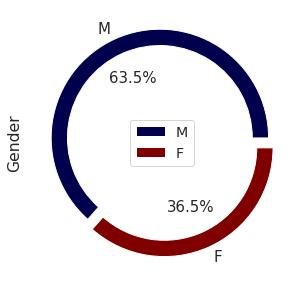

In [97]:
device_data_df['Gender'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=15, autopct='%3.1f%%',figsize=(5,5), shadow=True, legend=True, wedgeprops=dict(width=0.15), cmap='seismic')
plt.legend(loc='center')
plt.show()

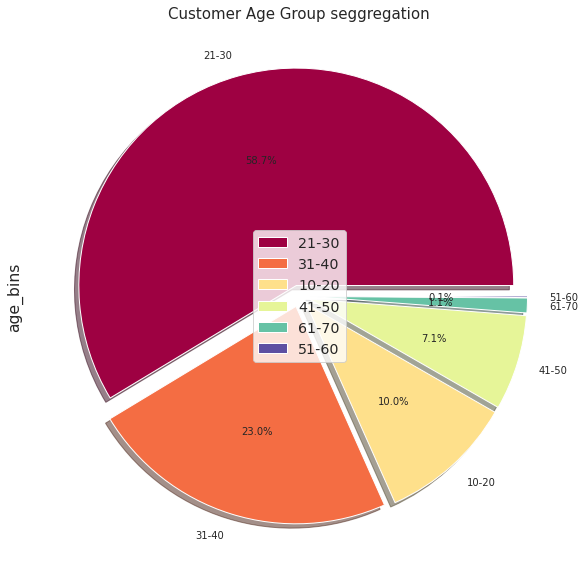

In [111]:
device_data_df['age_bins'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05,0.05,0.05,0.05],fontsize=10, autopct='%3.1f%%', figsize=(10,10), shadow=True,legend=True, cmap='Spectral')
plt.legend(loc='center')
plt.title('Customer Age Group seggregation',fontsize=15)
plt.show()

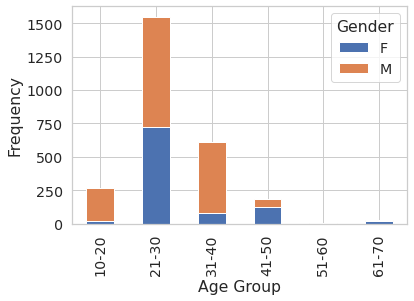

In [116]:
age_gender = device_data_df.groupby(['age_bins', 'Gender'])['age_bins'].count().unstack('Gender').fillna(0)
age_gender.plot(kind="bar",stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.show()

In [120]:
import warnings
warnings.filterwarnings('ignore')

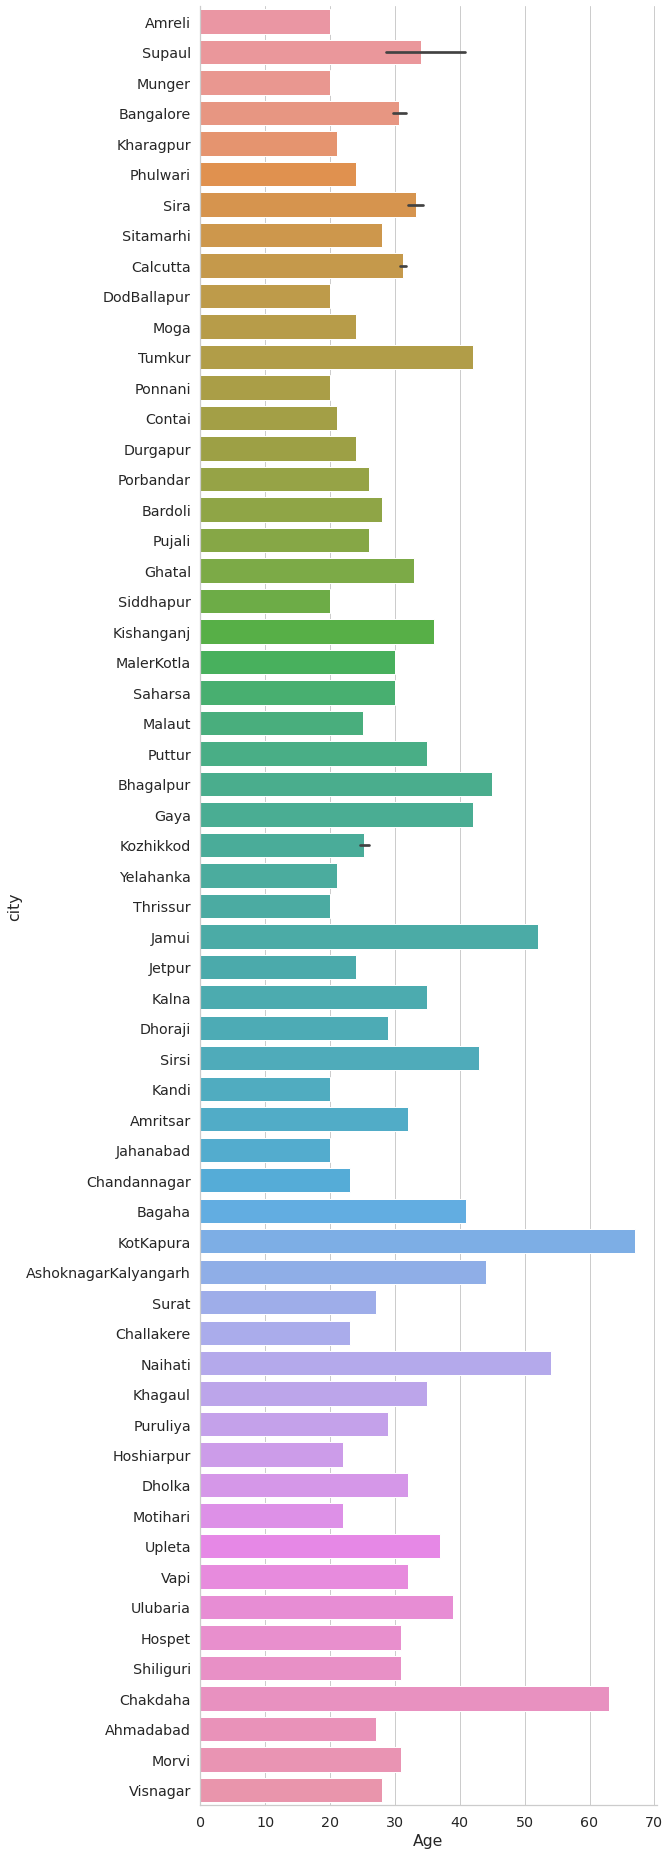

In [131]:
#Scatter Plot to show age Vs City
sns.catplot(x="Age",y="city", data=device_data_df,kind='bar')
fig=plt.gcf()
fig.set_size_inches(15,30)

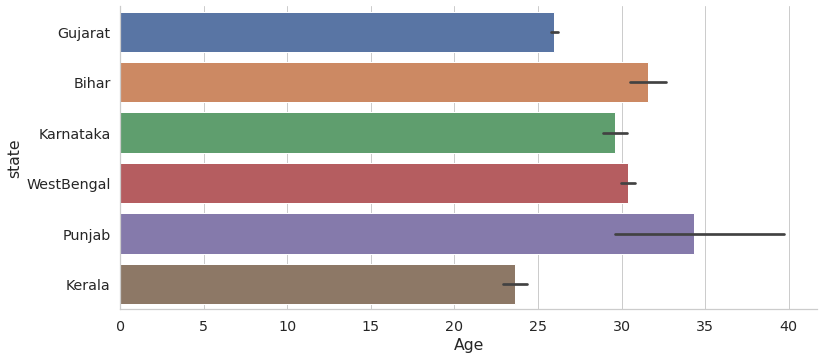

In [152]:
#Scatter Plot to show age Vs state
sns.catplot(x="Age",y="state", data=device_data_df,kind='bar')
fig=plt.gcf()
fig.set_size_inches(15,5)

In [162]:
device_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,Gender,Age,Age_Group,Brand,Model,age_bins
0,1836426,3.872522e+18,2016-05-01 20:29:14,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,Coolpad,8702,10-20
1,225132,3.872522e+18,2016-05-01 12:52:44,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,Coolpad,8702,10-20
2,815723,3.872522e+18,2016-05-01 12:28:56,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,Coolpad,8702,10-20
3,1300157,3.872522e+18,2016-05-04 23:24:57,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,Coolpad,8702,10-20
4,233682,3.872522e+18,2016-05-04 19:09:26,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,Coolpad,8702,10-20


In [175]:
device_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2641 entries, 0 to 2640
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   event_id   2641 non-null   int64   
 1   device_id  2641 non-null   float64 
 2   timestamp  2641 non-null   object  
 3   longitude  2641 non-null   float64 
 4   latitude   2641 non-null   float64 
 5   city       2641 non-null   object  
 6   state      2641 non-null   object  
 7   Gender     2641 non-null   object  
 8   Age        2641 non-null   int64   
 9   Age_Group  2641 non-null   object  
 10  Brand      2641 non-null   object  
 11  Model      2641 non-null   object  
 12  age_bins   2641 non-null   category
dtypes: category(1), float64(3), int64(2), object(7)
memory usage: 351.0+ KB


In [194]:
device_data_df['Brand'].value_counts()

Xiaomi     941
Samsung    577
Huawei     369
vivo       205
Coolpad    161
OPPO        95
Meizu       94
LeEco       72
HTC         57
一加          35
亿通          17
努比亚          9
酷比魔方         8
锤子           1
Name: Brand, dtype: int64